### Investigate 1566 null dates
    - in
      - assignment_due_date
      - assignment_final_submission_date
      - assignment_start_date
    - Verify same observations as 1566 [unassigned] in response_correctness'

In [9]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.


In [10]:
filterDf  = load_df('filterDf')

###### Create Dataframe of 1566 [unassigned] observations

In [11]:
unassignedDf = filterDf.filter(F.col("response_correctness") == "[unassigned]")

unassignedDf.count()

1566

1,566 unassigned observations

###### Display distinct values

In [12]:
distinct_val(unassignedDf)

,0
assigned_item_status,scored
assignment_attempt_number,0
assignment_max_attempts,0
is_affecting_grade,True
is_force_scored,False
is_manual_scoring_required,False
item_is_offline_scored,False
org_id,117713
response_correctness,[unassigned]
scoring_type_code,[unassigned]


- is_affecting_grade = True
- assignment_max_attempts = 0
- assignment_attempt_number = 0
- is_force_scored = False
- is_manual_scoring_required = False
- item_is_offline_scored = False
- scoring_type_code = [unassigned]
- response_correctness = [unassigned]
- assigned_item_status = scored
- org_id = 117713

###### Compare dates with full sample

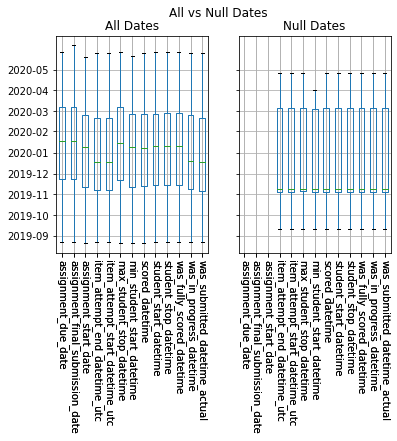

In [13]:
dual_date_boxplot(
    get_random_sample(filterDf),
    unassignedDf,
    title1="All Dates",
    title2='Null Dates',
    main='All vs Null Dates'
)

#### Verify same observations as 1566 [unassigned] in response_correctness'

##### Count the null dates in the 1566 [unassigned] observations

In [3]:

unassignedDf.agg(
        F.sum(F.when(F.col('assignment_due_date').isNull(),              1).otherwise(0)).alias('assignment_due_date'),
        F.sum(F.when(F.col('assignment_final_submission_date').isNull(), 1).otherwise(0)).alias('assignment_final_submission_date'),
        F.sum(F.when(F.col('assignment_start_date').isNull(),            1).otherwise(0)).alias('assignment_start_date'),
      ).toPandas().head(1).transpose()

,0
assignment_due_date,1566
assignment_final_submission_date,1566
assignment_start_date,1566


- They are the same observations
- Will be addressed with the 1566 [unassigned] in response_correctness

In [4]:
finish_todo('Investigate 1566 null dates')